In [263]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LassoCV
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import sparse
from sklearn.metrics import r2_score
import numpy as np


In [264]:
df = pd.read_csv("data/data-science-salaries-2023/v7_Latest_Data_Science_Salaries.csv")
df.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [265]:
df.columns = [c.lower().replace(' ', "_") for c in df.columns]
df = df.rename(columns={"year":"work_year"})

In [266]:
for col in df.select_dtypes("object"):
  print(col)
  display(df[col].unique())


job_title


array(['Data Engineer', 'Data Analyst', 'Business Intelligence Developer',
       'BI Developer', 'Business Intelligence Analyst', 'Data Developer',
       'AI Architect', 'Data Architect', 'Data Scientist',
       'Machine Learning Engineer', 'Data Science', 'Research Engineer',
       'Data Science Manager', 'Data Analytics Manager',
       'Research Analyst', 'AI Engineer', 'Research Scientist',
       'Data Science Engineer', 'Data Product Manager',
       'Analytics Engineer', 'Data Specialist', 'Data Modeler',
       'ETL Developer', 'Data Strategist', 'Prompt Engineer',
       'Data Science Lead', 'ML Engineer', 'Data Quality Manager',
       'Applied Scientist', 'Head of Data',
       'Business Intelligence Engineer', 'Data Science Consultant',
       'Machine Learning Scientist', 'Business Intelligence Manager',
       'Data Manager', 'Computer Vision Engineer', 'AI Product Manager',
       'Data Analytics Lead', 'Director of Data Science',
       'Data Product Owner', 'Machin

employment_type


array(['Full-Time', 'Part-Time', 'Contract', 'Freelance'], dtype=object)

experience_level


array(['Mid', 'Entry', 'Senior', 'Executive'], dtype=object)

expertise_level


array(['Intermediate', 'Junior', 'Expert', 'Director'], dtype=object)

salary_currency


array(['United States Dollar', 'British Pound Sterling', 'Euro',
       'Canadian Dollar', 'Australian Dollar', 'Indian Rupee',
       'Polish Zloty', 'Brazilian Real', 'Philippine Peso',
       'Turkish Lira', 'Swiss Franc', 'Norwegian Krone', 'Japanese Yen',
       'South African Rand', 'Hong Kong Dollar', 'Singapore Dollar',
       'Israeli New Shekel', 'Thai Baht', 'Hungarian Forint',
       'Danish Krone', 'Mexican Peso', 'Chilean Peso'], dtype=object)

company_location


array(['United States', 'Canada', 'United Kingdom', 'Portugal', 'Ireland',
       'Germany', 'South Africa', 'Australia', 'New Zealand', 'Hungary',
       'India', 'Spain', 'Viet Nam', 'Nigeria', 'Philippines', 'Poland',
       'France', 'Netherlands', 'Luxembourg', 'Lithuania', 'Gibraltar',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'Latvia',
       'Mauritius', 'Russian Federation', 'Italy', 'Korea, Republic of',
       'Estonia', 'Czechia', 'Switzerland', 'Brazil', 'Qatar', 'Kenya',
       'Denmark', 'Ghana', 'Sweden', 'Turkey', 'Andorra', 'Ecuador',
       'Mexico', 'Israel', 'Saudi Arabia', 'Norway', 'Argentina', 'Japan',
       'Hong Kong', 'Central African Republic', 'Finland', 'Singapore',
       'Thailand', 'Croatia', 'Armenia', 'Bosnia and Herzegovina',
       'Pakistan', 'Iran, Islamic Republic of', 'Bahamas', 'Austria',
       'Puerto Rico', 'American Samoa', 'Belgium', 'Indonesia', 'Egypt',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria

employee_residence


array(['United States', 'Canada', 'United Kingdom', 'Portugal', 'Ireland',
       'Germany', 'South Africa', 'Australia', 'New Zealand', 'Hungary',
       'India', 'Spain', 'Viet Nam', 'Nigeria', 'Philippines', 'Poland',
       'France', 'Czechia', 'Netherlands', 'Pakistan', 'Ukraine',
       'Lithuania', 'Uganda', 'Colombia', 'Italy', 'Slovenia', 'Romania',
       'Greece', 'Latvia', 'Mauritius', 'Armenia', 'Croatia', 'Thailand',
       'Korea, Republic of', 'Estonia', 'Turkey', 'Brazil', 'Qatar',
       'Russian Federation', 'Kenya', 'Tunisia', 'Ghana', 'Belgium',
       'Switzerland', 'Andorra', 'Ecuador', 'Peru', 'Mexico',
       'Moldova, Republic of', 'Saudi Arabia', 'Norway', 'Argentina',
       'Egypt', 'Uzbekistan', 'Georgia', 'Japan', 'Hong Kong',
       'Central African Republic', 'Finland', 'Israel', 'Austria',
       'Singapore', 'Sweden', 'Kuwait', 'Cyprus',
       'Bosnia and Herzegovina', 'Iran, Islamic Republic of',
       'American Samoa', 'China', 'Costa Rica', 'Chil

company_size


array(['Medium', 'Large', 'Small'], dtype=object)

In [267]:
ds_titles = ["AI Architect",
"AI Developer",
"AI Engineer",
"AI Product Manager",
"AI Programmer",
"AI Research Engineer",
"AI Scientist",
"Analytics Engineer",
"Analytics Engineering Manager",
"Applied Data Scientist",
"Applied Machine Learning Engineer",
"Applied Machine Learning Scientist",
"Data Analytics Consultant",
"Data Analytics Engineer",
"Data Analytics Lead",
"Data Analytics Manager",
"Data Analytics Specialist",
"Data Engineer",
"Data Modeler",
"Data Modeller",
"Data Science",
"Data Science Consultant",
"Data Science Director",
"Data Science Engineer",
"Data Science Lead",
"Data Science Manager",
"Data Science Practitioner",
"Data Science Tech Lead",
"Data Scientist",
"Data Scientist Lead",
"Data Visualization Analyst",
"Data Visualization Engineer",
"Data Visualization Specialist",
"Decision Scientist",
"Deep Learning Engineer",
"Deep Learning Researcher",
"Director of Data Science",
"Head of Data Science",
"Head of Machine Learning",
"Insight Analyst",
"Lead Data Scientist",
"Lead Machine Learning Engineer",
"Machine Learning Developer",
"Machine Learning Engineer",
"Machine Learning Infrastructure Engineer",
"Machine Learning Manager",
"Machine Learning Modeler",
"Machine Learning Operations Engineer",
"Machine Learning Research Engineer",
"Machine Learning Researcher",
"Machine Learning Scientist",
"Machine Learning Software Engineer",
"Machine Learning Specialist",
"Manager Data Management",
"Managing Director Data Science",
"ML Engineer",
"MLOps Engineer",
"NLP Engineer",
"Principal Data Scientist",
"Principal Machine Learning Engineer",
"Prompt Engineer",
"Research Scientist",]

In [268]:
df = df.loc[
    df["company_location"].eq("United States")
    & df["employee_residence"].eq("United States")
    # & df.job_title.isin(ds_titles),
    ,[
        "work_year",
        "salary_in_usd",
        "job_title",
        "experience_level", 
        "employment_type",
        "company_size",
    ],
]
y = df["salary_in_usd"]
del df["salary_in_usd"]

In [269]:
# prompt: Using dataframe df: create a transformation pipeline. Encode the variables employment type, experience level, expertise level and company size.  rewrite this to reflect changes to the data frame

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Create a OneHotEncoder object
ohe = OneHotEncoder(drop=None, sparse_output=True)

one_hots = ["employment_type", "work_year", "experience_level", "company_size"]

cvect = CountVectorizer()
df_ohe = ohe.fit_transform(
    df[one_hots]
)

df_cvect = cvect.fit_transform(df["job_title"])
ohe_shape = df_ohe.shape
cvect_shape = df_cvect.shape
X = sparse.hstack(
    [df_ohe,  df_cvect]
)


# df_ohe = ohe.fit_transform(df[['employment_type']])
# df["experience_level"] = df.experience_level.replace(
#     {"Entry": 1, "Mid": 2, "Senior": 3, "Executive": 4}
# )
# df["expertise_level"] = df.expertise_level.replace(
#     {"Junior": 1, "Intermediate": 2, "Expert": 3, "Director": 4}
# )
# df["company_size"] = df.company_size.replace({"Small": 1, "Medium": 2, "Large": 3})
# df_cvect = cvect.fit_transform(df["job_title"])
# ohe_shape = df_ohe.shape
# cvect_shape = df_cvect.shape
# X = sparse.hstack(
#     [df_ohe, df[["work_year", "experience_level", "company_size"]], df_cvect]
# )

In [270]:
lasso = LassoCV(cv=10, n_jobs=-1, alphas=np.linspace(50, 120, 1000))

lasso.fit(X=X, y = y.values.ravel())

LassoCV(alphas=array([ 50.        ,  50.07007007,  50.14014014,  50.21021021,
        50.28028028,  50.35035035,  50.42042042,  50.49049049,
        50.56056056,  50.63063063,  50.7007007 ,  50.77077077,
        50.84084084,  50.91091091,  50.98098098,  51.05105105,
        51.12112112,  51.19119119,  51.26126126,  51.33133133,
        51.4014014 ,  51.47147147,  51.54154154,  51.61161161,
        51.68168168,  51.75175175,  51.82182182,  51.89189189,
        51...
       118.10810811, 118.17817818, 118.24824825, 118.31831832,
       118.38838839, 118.45845846, 118.52852853, 118.5985986 ,
       118.66866867, 118.73873874, 118.80880881, 118.87887888,
       118.94894895, 119.01901902, 119.08908909, 119.15915916,
       119.22922923, 119.2992993 , 119.36936937, 119.43943944,
       119.50950951, 119.57957958, 119.64964965, 119.71971972,
       119.78978979, 119.85985986, 119.92992993, 120.        ]),
        cv=10, n_jobs=-1)

In [271]:
# prompt: evaluate lasso model

lasso_pred = lasso.predict(X)

print(r2_score(y_true=y, y_pred=lasso_pred))

np.r_[
    ohe.get_feature_names_out(), 
    
    cvect.get_feature_names_out(),
][lasso.coef_ > 0]
    


0.24299727346680666


array(['work_year_2020', 'work_year_2023', 'experience_level_Executive',
       'experience_level_Senior', 'company_size_Large', 'ai', 'applied',
       'architect', 'computer', 'engineer', 'infrastructure', 'lead',
       'learning', 'manager', 'ml', 'of', 'principal', 'product',
       'research', 'science', 'scientist', 'vision'], dtype=object)

In [272]:
df[df.job_title.str.contains("vision", case=False)]

,work_year,job_title,experience_level,employment_type,company_size
513,2023,Computer Vision Engineer,Senior,Full-Time,Medium
514,2023,Computer Vision Engineer,Senior,Full-Time,Medium
1977,2023,Computer Vision Engineer,Senior,Full-Time,Medium
1978,2023,Computer Vision Engineer,Senior,Full-Time,Medium
3780,2023,Computer Vision Engineer,Senior,Full-Time,Medium
3781,2023,Computer Vision Engineer,Senior,Full-Time,Medium
3841,2023,Computer Vision Engineer,Senior,Full-Time,Medium
3842,2023,Computer Vision Engineer,Senior,Full-Time,Medium
3909,2023,Computer Vision Engineer,Senior,Full-Time,Medium
3910,2023,Computer Vision Engineer,Senior,Full-Time,Medium


In [273]:
df[df.job_title.str.contains(r"ml", case=False)].job_title.value_counts()

job_title
ML Engineer       91
MLOps Engineer    12
Name: count, dtype: int64

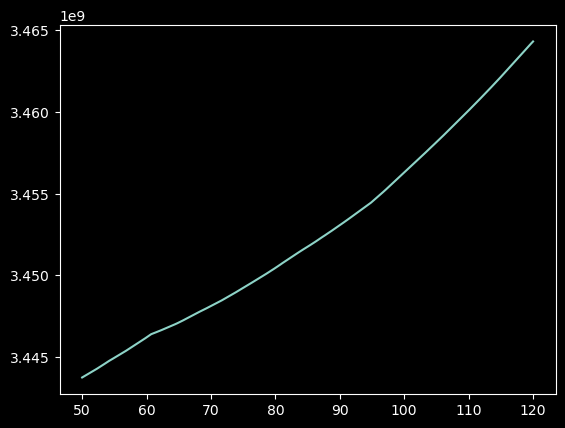

In [274]:
import matplotlib.pyplot as plt
# plt.scatter(y, lasso_pred)
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=1))

In [275]:
lasso.alpha_

50.0